# Prodigy InfoTech Data Science Task 2


## Finding Patterns in Titanic Survival Data

In my second task during my internship, I am focusing on analyzing the Titanic survival data to identify patterns and gain insights into the factors that influenced survival rates. This analysis will involve exploring various variables such as age, gender, passenger class, and embarkation point to uncover any correlations or trends.

By examining the Titanic dataset, I aim to answer questions such as:

- Did gender play a significant role in survival rates?
- Were passengers from higher classes more likely to survive?
- Did age or family size impact the chances of survival?

To accomplish this task, I will utilize various data analysis techniques, including data visualization, statistical analysis, and machine learning algorithms. By uncovering patterns in the Titanic survival data, I hope to contribute valuable insights that can aid in understanding the factors that influenced survival during this tragic event.


## Importing the Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Getting the Data

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train_df.shape)
print(train_df.describe())

(891, 12)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Checking null values

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [7]:
train_df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Visualizing the Data that contributes to the survival of the passengers

### Age and Sex

<Axes: title={'center': 'Male'}, xlabel='Age', ylabel='Count'>

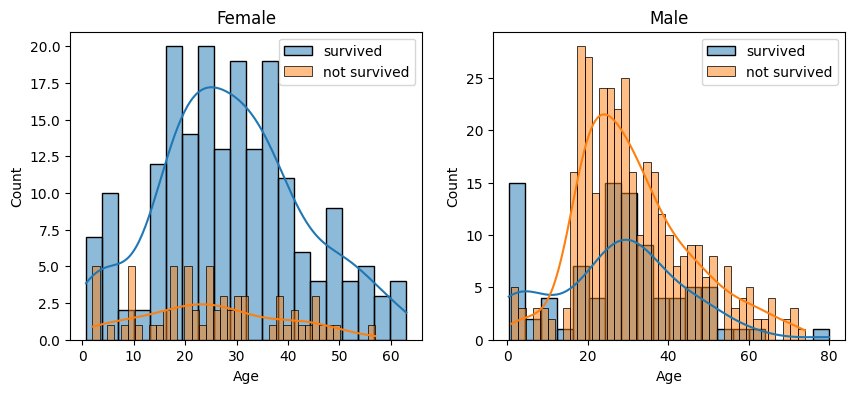

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = train_df[train_df["Sex"] == "female"]
men = train_df[train_df["Sex"] == "male"]
ax = sns.histplot(
    women[women["Survived"] == 1].Age.dropna(),
    bins=20,
    label="survived",
    ax=axes[0],
    kde=True,
)
ax = sns.histplot(
    women[women["Survived"] == 0].Age.dropna(),
    bins=40,
    label= "not survived",
    ax=axes[0],
    kde=True,
)
ax.legend()
ax.set_title("Female")
ax = sns.histplot(
    men[men["Survived"] == 1].Age.dropna(),
    bins=20,
    label="survived",
    ax=axes[1],
    kde=True,
)
ax = sns.histplot(
    men[men["Survived"] == 0].Age.dropna(),
    bins=40,
    label= "not survived",
    ax=axes[1],
    kde=True,
)
ax.legend()
ax.set_title("Male")
axes[1]

### Embarked, Pclass and Sex

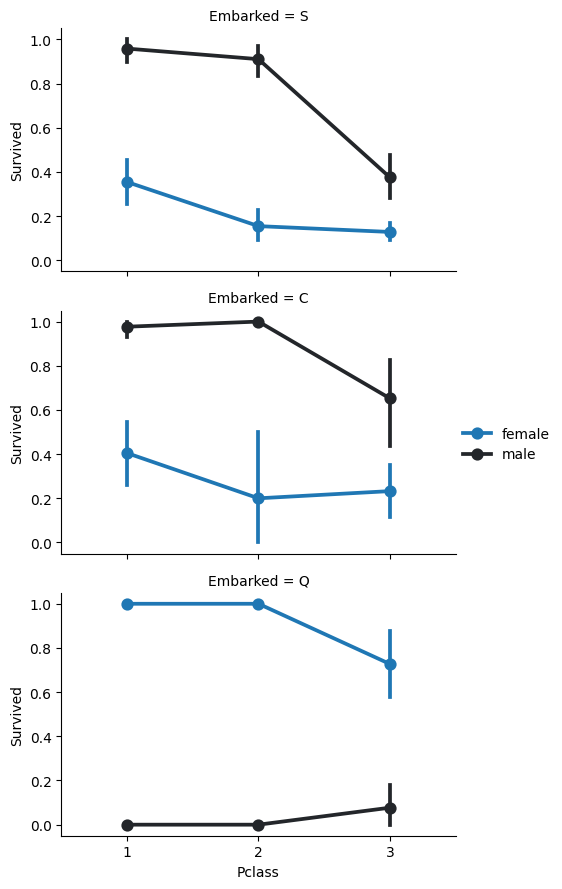

In [9]:
FacetGrid = sns.FacetGrid(train_df, row="Embarked", aspect=1.6)
FacetGrid.map(
    sns.pointplot,
    "Pclass",
    "Survived",
    "Sex",
    palette="dark:#1f77b4",
    order=None,
    hue_order=None,
)
FacetGrid.add_legend()

Women on port Q have a higher chance of survival. The inverse is true, if they are at port C or S.  
Men have a high survival probability if they are on port S or C, but a low probability if they are on port Q.

### PClass

<Axes: xlabel='Pclass', ylabel='Survived'>

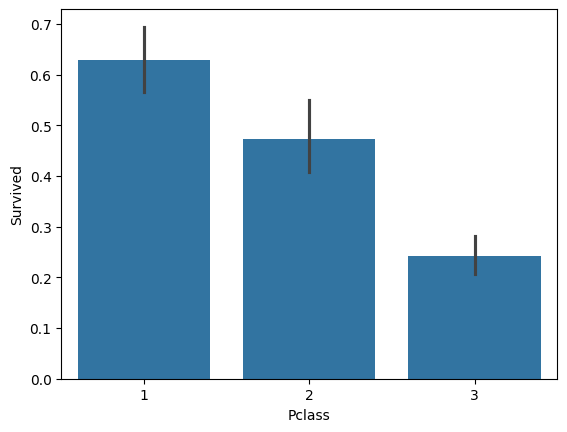

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train_df)

Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

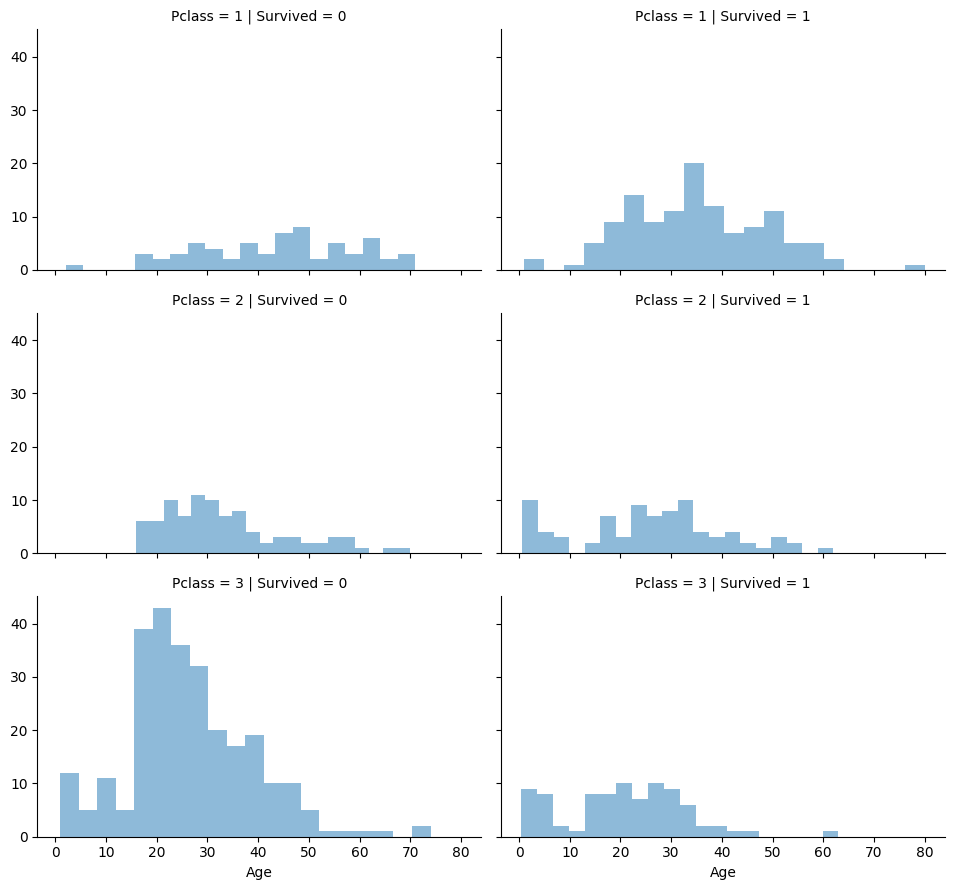

In [11]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

### Parch and SibSp
SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that shows if someone is not alone.

In [12]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

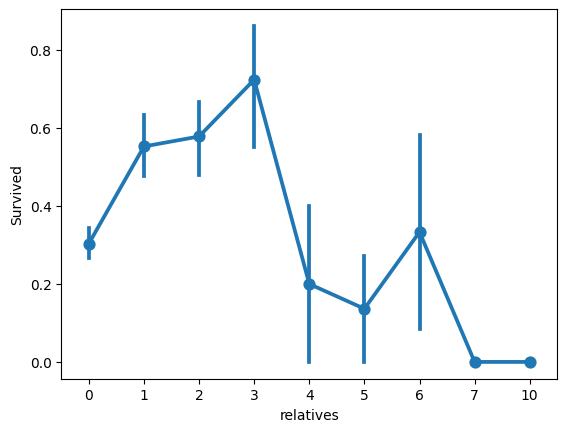

In [13]:
axes = sns.pointplot(
    data=train_df,
    x = train_df['relatives'],
    y = train_df["Survived"]
)

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

## Data Preprocessing

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

In [14]:
train_df = train_df.drop(["PassengerId"], axis=1)

### Missing Data

### Cabin
A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [15]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset["Cabin"] = dataset["Cabin"].fillna("U0")
    dataset["Deck"] = dataset["Cabin"].map(
        lambda x: re.compile("([a-zA-Z]+)").search(x).group()
    )
    dataset["Deck"] = dataset["Deck"].map(deck)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    dataset["Deck"] = dataset["Deck"].astype(int)
# Drop the cabin feature
train_df = train_df.drop(["Cabin"], axis=1)
test_df = test_df.drop(["Cabin"], axis=1)

In [16]:
train_df["Deck"]

0      8
1      3
2      8
3      3
4      8
      ..
886    8
887    2
888    8
889    3
890    8
Name: Deck, Length: 891, dtype: int32

### Age

We are going to fill the missing age values with random numbers, which are computed based on the mean age value in regards to the standard deviation.

In [17]:
data = [train_df, test_df]

for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    number_of_nulls = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size=number_of_nulls)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

### Embarked

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [18]:
for dataset in data:
    print(dataset["Embarked"].describe().top)

S
S


In [19]:
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna('S')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


## Converting Features

### Fare

In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

### Name
We will extract the titles from the names and build a new feature from that.

In [22]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # extract titles
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    
    # replace titles with a more common title or as Rare
    dataset["Title"] = dataset["Title"].replace(
        [
            "Lady",
            "Countess",
            "Capt",
            "Col",
            "Don",
            "Dr",
            "Major",
            "Rev",
            "Sir",
            "Jonkheer",
            "Dona",
        ],
        "Other",
    )
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
    # convert titles into numbers
    dataset["Title"] = dataset["Title"].map(titles)
    
    # filling NaN with 0
    dataset["Title"] = dataset["Title"].fillna(0)
    
train_df = train_df.drop(["Name"], axis=1)
test_df = test_df.drop(["Name"], axis=1)

### Sex
Convert ‘Sex’ feature into numeric.

In [23]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)


### Ticket


In [24]:
train_df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [25]:
train_df = train_df.drop(["Ticket"], axis=1)
test_df = test_df.drop(["Ticket"], axis=1)

### Embarked
Convert ‘Embarked’ feature into numeric.

In [26]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(ports)

## Creating Categories

### Age

In [27]:
data = [train_df, test_df]
def categorize_age(x):
    if x <= 11:
        return 0
    elif x <= 18:
        return 1
    elif x <= 22:
        return 2
    elif x <= 27:
        return 3
    elif x <= 33:
        return 4
    elif x <= 40:
        return 5
    elif x <= 66:
        return 6
    else:
        return 7
    
for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)
    dataset["Age"] = dataset["Age"].map(categorize_age)

# Total 8 categories.
train_df['Age'].value_counts()

Age
6    166
4    159
5    142
3    137
2    115
1     97
0     68
7      7
Name: count, dtype: int64

### Fare
we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [28]:
print(pd.qcut(sorted(train_df['Fare']), q=5,precision=0))

[(-1.0, 7.0], (-1.0, 7.0], (-1.0, 7.0], (-1.0, 7.0], (-1.0, 7.0], ..., (39.0, 512.0], (39.0, 512.0], (39.0, 512.0], (39.0, 512.0], (39.0, 512.0]]
Length: 891
Categories (5, interval[float64, right]): [(-1.0, 7.0] < (7.0, 10.0] < (10.0, 21.0] < (21.0, 39.0] < (39.0, 512.0]]


In [29]:
data = [train_df, test_df]

def categorize_fare(fare):
    if fare <= 7.0:
        return 0
    elif fare <= 10.0:
        return 1
    elif fare <= 21.0:
        return 2
    elif fare <= 39.0:
        return 3
    else:
        return 4

for dataset in data:
    dataset["Fare"] = dataset["Fare"].map(categorize_fare)
    dataset["Fare"] = dataset["Fare"].astype(int)

train_df["Fare"].value_counts()

Fare
0    241
3    180
4    176
2    171
1    123
Name: count, dtype: int64

## Creating new Features

### Age times Class

In [30]:
data = [train_df, test_df]
for dataset in data:
    dataset["Age_Class"] = dataset["Age"] * dataset["Pclass"]

### Fare per Person

In [31]:
for dataset in data:
    dataset["Fare_Per_Person"] = dataset["Fare"] / (dataset["relatives"] + 1)
    dataset["Fare_Per_Person"] = dataset["Fare_Per_Person"].astype(int)

# Checking the train data
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,4,1,1,0,3,3,5,2
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,4,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,4,0,0,1,5,1,6,4
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,2,0,2,0,8,3,9,0
9,1,2,1,1,1,0,3,1,1,0,8,3,2,1


# Building Machine Learning Models

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

## Data

In [32]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,5,1,0,4,1,1,0,3,3,5,2
2,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,5,1,0,4,0,1,0,3,3,5,2
4,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,2,0,0,1,8,5,6,2
887,1,1,2,0,0,3,0,0,1,2,2,2,3
888,3,1,6,1,2,3,0,3,0,8,2,18,0
889,1,0,3,0,0,3,1,0,1,3,1,3,3


## Machine Learning Models:

### Stochastic Gradient Descent (SGD):

In [33]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### Random Forest:

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### Logistic Regression:

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

c:\Users\Thej Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K Nearest Neighbor:

In [36]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Gaussian Naive Bayes:

In [37]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### Perceptron:

In [38]:
perceptron = Perceptron(max_iter=20)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### Linear Support Vector Machine:

In [39]:
linear_svc = LinearSVC(dual = 'auto')
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

### Decision Tree:

In [40]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Performance Evaluation
Now lets check which model performs the best.

In [41]:
results = pd.DataFrame(
    {
        "Model": [
            "Support Vector Machines",
            "KNN",
            "Logistic Regression",
            "Random Forest",
            "Naive Bayes",
            "Perceptron",
            "Stochastic Gradient Decent",
            "Decision Tree",
        ],
        "Score": [
            acc_linear_svc,
            acc_knn,
            acc_log,
            acc_random_forest,
            acc_gaussian,
            acc_perceptron,
            acc_sgd,
            acc_decision_tree,
        ],
    }
)
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df

,Model
Score,
92.70,Random Forest
92.70,Decision Tree
87.09,KNN
82.49,Perceptron
81.82,Logistic Regression
81.03,Support Vector Machines
78.45,Stochastic Gradient Decent
77.55,Naive Bayes


Ranking the models according to their accuracy score, we conclude that the Random Forest classifier is the best model for this dataset.

### K-Fold Cross Validation:
We will use K-Fold Cross Validation to validate our Random Forest model.

In [42]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75977654 0.79775281 0.83146067 0.79213483 0.83707865]
Mean: 0.803640700520997
Standard Deviation: 0.028224686720689496


### Checking Feature Importance

In [43]:
importances = pd.DataFrame(
    {
        "feature": X_train.columns,
        "importance": np.round(random_forest.feature_importances_, 3),
    }
)
importances = importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
importances.head(15)

,importance
feature,
Title,0.194
Sex,0.165
Age_Class,0.095
Deck,0.090
Fare,0.082
Age,0.079
Pclass,0.066
relatives,0.061
Embarked,0.054


<Axes: xlabel='feature'>

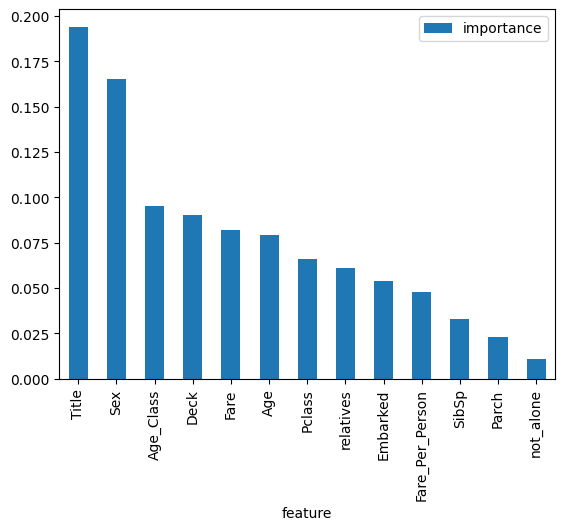

In [44]:
importances.plot.bar()

Since not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process, we will drop them from the dataset and train the classifier again.

In [45]:
train_df = train_df.drop("not_alone", axis=1)
test_df = test_df.drop("not_alone", axis=1)

train_df = train_df.drop("Parch", axis=1)
test_df = test_df.drop("Parch", axis=1)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

### Training random forest again:

In [46]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(
    "Accuracy:",
    round(acc_random_forest,2,),
    "%",
)
print("OOB score:", round(random_forest.oob_score_, 4) * 100, "%")

Accuracy: 92.7 %
OOB score: 80.81 %


## Hyperparameter Tuning
Finding the best parameters for our model, using GridSearchCV.

In [47]:
# Commented due to long execution time
'''
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 4, 10, 12, 16, 18, 25],
}
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(
    n_estimators=100, max_features="sqrt", oob_score=True, random_state=1, n_jobs=-1
)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_
'''
'''
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10}
'''

"\n{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10}\n"

### Test new Parameters:

In [48]:
# Random Forest
random_forest = RandomForestClassifier(
    criterion="gini",
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    max_features="sqrt",
    oob_score=True,
    random_state=1,
    n_jobs=-1,
)

random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)

print("OOB score:", round(random_forest.oob_score_, 4) * 100, "%")

OOB score: 82.49 %


### Confusion Matrix:

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
c_matrix = confusion_matrix(Y_train, predictions)
c_matrix

array([[493,  56],
       [ 95, 247]], dtype=int64)

The first row is about the not-survived-predictions: 494 passengers were correctly classified as not survived (called true negatives) and 55 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 96 passengers where wrongly classified as survived (false negatives) and 246 where correctly classified as survived (true positives).

In [50]:
not_survived_accuracy = round(c_matrix[0, 0] / (c_matrix[0, 0] + c_matrix[0, 1]) * 100, 2)
survived_accuracy = round(c_matrix[1, 1] / (c_matrix[1, 0] + c_matrix[1, 1]) * 100, 2)
print("Accuracy in predicting not survived:", not_survived_accuracy, "%")
print("Accuracy in predicting survived:", survived_accuracy, "%")
total_accuracy = round(
    (c_matrix[0, 0] + c_matrix[1, 1]) / (c_matrix[0, 0] + c_matrix[0, 1] + c_matrix[1, 0] + c_matrix[1, 1]) * 100, 2
)
print("Total Accuracy:", total_accuracy, "%")

Accuracy in predicting not survived: 89.8 %
Accuracy in predicting survived: 72.22 %
Total Accuracy: 83.05 %


## Checking the Predictions for Train Set

In [51]:
Y_train_prediction = random_forest.predict(X_train)
accuracy_df = pd.DataFrame(
    {
        "Actual": Y_train,
        "Predicted": Y_train_prediction,
    }
)
accuracy_df["Matching"] = np.where(
    accuracy_df["Actual"] == accuracy_df["Predicted"], True, False
)
print("Accuracy after predicting Train_df :", round(sum(accuracy_df["Matching"]) / len(accuracy_df) * 100, 2), "%")
accuracy_df

Accuracy after predicting Train_df : 89.34 %


,Actual,Predicted,Matching
0,0,0,True
1,1,1,True
2,1,1,True
3,1,1,True
4,0,0,True
...,...,...,...
886,0,0,True
887,1,1,True
888,0,0,True
889,1,1,True


# Predicting the results for Test Set

In [52]:
Y_test_prediction = random_forest.predict(X_test)
display_test_df = test_df["PassengerId"].copy().to_frame()
display_test_df["SurvivalPrediction"] = Y_test_prediction
display_test_df

,PassengerId,SurvivalPrediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Conclusion
* We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important.  
* During this process we used seaborn and matplotlib to do the visualizations.  
* During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features.  
* Afterwards we started training 8 different machine learning models, picked one of them (random forest) and applied cross validation on it.  
* Then we discussed how random forest works, took a look at the importance it assigns to the different features and tuned it’s performace through optimizing it’s hyperparameter values. Then, we looked at it’s confusion matrix and computed the models precision.
* In the end we looked at the models score (accuracy score) on the given train dataset and predicted the Survival of passengers in Test dataset.